### Instructions:

- You need to code in this jupyter notebook only.
- Download this notebook and import in your jupyter lab.
- You need to write a partial code for step 0 to step 8 mentioned with prefix ##
- Fill the blanks where it is instructed in comments.
- Leave other codes, structure as it is.
- Follow all the instructions commented in the cells.

**Answer the questions given at the end of this notebook within your report.**

**Upload this jupyter notebook after completion with your partial code and the report in one file in PDF format. Your file name should be yourname_lab4.pdf**

**Also upload the resulting image showing all the selected points and boundary line between them after LDA analysis.**

**Your submission should contain the pdf file and the output plot. Upload it on the LMS before the due time.**


In [16]:
import numpy as np  ## import numpy
import cv2  ## import opencv
import matplotlib  ## import matplotlib
import matplotlib.pyplot as plt  ## import matplotlib pyplot
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
)  ## from sklearn import LDA analysis

matplotlib.use("TkAgg")
##---------------------------------------------------
## Step 0: Install all other dependencies that occur at run time if any module not found.
##---------------------------------------------------

In [17]:
## Number of points you want select from each strip. Recommended >= 20
Number_of_points = 25

img = cv2.imread("Indian_Flag.jpg")  ## Read the given image


def select_points(img, title):
    fig, ax = plt.subplots()
    # ------------------------------------------
    ## step 1: Convert the img from BGR to RGB using cv2 and display it using cv2.imshow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    ## step 2: Put title of the image
    ax.set_title(title)
    ##-----------------------------------------

    # Set the cursor style to a plus sign
    fig.canvas.manager.set_window_title("Select Points")
    cursor = matplotlib.widgets.Cursor(ax, useblit=True, color="red", linewidth=1)
    plt.show(block=False)  # Show the image without blocking

    k = 0
    points = []  ## Create here an empty list to store points

    while k < Number_of_points:
        xy = plt.ginput(1, timeout=0)  # Non-blocking input
        if len(xy) > 0:
            col, row = map(int, xy[0])  # Convert to integer
            ##-----------------------------------------------
            ## Step 3: Collect RGB values at the clicked positions (col, row) and print it.
            ##-----------------------------------------------

            k += 1
            points.append(
                [row, col, img[row, col]]
            )  # Store RGB values in empty list points.

            # Display colored dot on the image
            plt.scatter(col, row, c="black", marker="o", s=10)

            # Redraw the image to include the dot
            plt.draw()

    plt.close()  # Close the window after all points are collected
    return points  ## Fill this blank

In [18]:
##-----------------------------------------------------------------
## Step4: fill the blanks for Selected points from saffron strip
pts_saffron = select_points(img, "Saffron Strip")
## Step5: fill the blanks for Selected points from white strip)
pts_white = select_points(img, "White Strip")
## Step6: fill the blanks for Selected points from green strip
pts_green = select_points(img, "Green Strip")
##-----------------------------------------------------------------
%matplotlib inline

In [19]:
# Convert RGB values to Lab color space
def rgb_to_lab(rgb):
    return cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2Lab)[0][0]


saffron_lab = np.array([rgb_to_lab(rgb) for _, _, rgb in pts_saffron])
white_lab = np.array([rgb_to_lab(rgb) for _, _, rgb in pts_white])
green_lab = np.array([rgb_to_lab(rgb) for _, _, rgb in pts_green])

## Step7: Extract a* and b* components from Lab color space
a_features = np.hstack((saffron_lab[:, 1], white_lab[:, 1], green_lab[:, 1]))
b_features = np.hstack((saffron_lab[:, 2], white_lab[:, 2], green_lab[:, 2]))

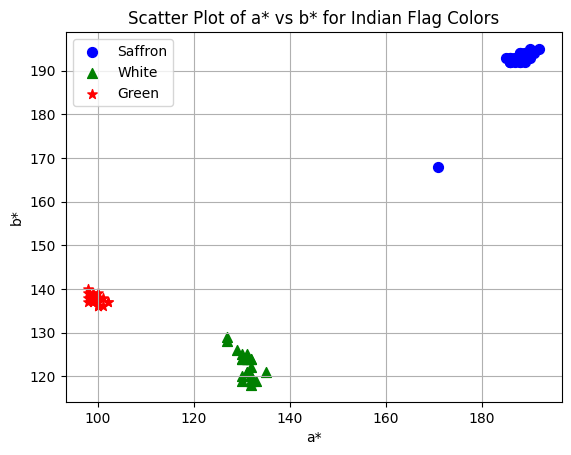

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [20]:
# Map class labels to numeric values
class_mapping = {"Saffron": 0, "White": 1, "Green": 2}
y = np.array(
    [
        class_mapping[label]
        for label in ["Saffron"] * Number_of_points
        + ["White"] * Number_of_points
        + ["Green"] * Number_of_points
    ]
)

plt.figure()
plt.scatter(
    a_features[:Number_of_points],
    b_features[:Number_of_points],
    c="b",
    marker="o",
    s=50,
    label="Saffron",
)
plt.scatter(
    a_features[Number_of_points : 2 * Number_of_points],
    b_features[Number_of_points : 2 * Number_of_points],
    c="g",
    marker="^",
    s=50,
    label="White",
)
plt.scatter(
    a_features[2 * Number_of_points :],
    b_features[2 * Number_of_points :],
    c="r",
    marker="*",
    s=50,
    label="Green",
)
plt.legend(["Saffron", "White", "Green"], loc="best")
plt.xlabel("a*")  ## Provide x label
plt.ylabel("b*")  ## Provide y label
plt.title("Scatter Plot of a* vs b* for Indian Flag Colors")  ## Provide title
plt.grid()
plt.show()

##------------------------------------------------------------
# Step 8: Perform LDA analysis using LinearDiscriminantAnalysis() and lda.fit()
lda = LinearDiscriminantAnalysis()
data = np.column_stack((a_features, b_features))
lda.fit(data, y)
##-----------------------------------------------------------

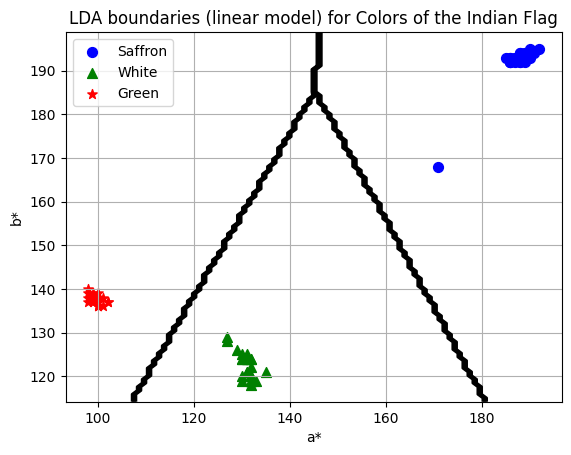

In [21]:
# Plot LDA boundaries
plt.figure()
plt.scatter(
    a_features[:Number_of_points],
    b_features[:Number_of_points],
    c="b",
    marker="o",
    s=50,
    label="Saffron",
)
plt.scatter(
    a_features[Number_of_points : 2 * Number_of_points],
    b_features[Number_of_points : 2 * Number_of_points],
    c="g",
    marker="^",
    s=50,
    label="White",
)
plt.scatter(
    a_features[2 * Number_of_points :],
    b_features[2 * Number_of_points :],
    c="r",
    marker="*",
    s=50,
    label="Green",
)

plt.xlabel("a*")  ## Provide x label
plt.ylabel("b*")  ## Provide y label
plt.title("LDA boundaries (linear model) for Colors of the Indian Flag")

# Plot the decision boundaries
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
)
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors="k", linewidths=2, linestyles="solid")
plt.legend(loc="best")
plt.grid()
plt.show()

## Report:

## Answer the following questions within your report:


### 1. What are the key assumptions underlying LDA, and how do these assumptions influence the model's performance?

- Each class follows normal distribution

- Independence observations

- Each class shares the same covariance matrix

- Linearly separable classes in projected space

LDA produces components that maximize between class scatter while minimizing within class scatter. If the assumptions are violated, the model's performance will degrade, leading to poor classification results.

---

### 2. What are the hyperparameters in LDA, and how do they affect the outcome of the model?

- **Number of discriminant components:** LDA can produce at most $C−1$ components, where $C$ is the number of classes. This limits the dimensionality of the transformed feature space.

- **Choice of kernel (in Kernel LDA):** Enables LDA to handle non-linearly separable data by projecting it into higher-dimensional spaces.

---

### 3. What methods can be used to assess an LDA model's effectiveness?

- Fisher Linear Discriminant

- Visualization of projected data

- Classification reports (accuracy, precision, recall, F1-score)

---

### 4. What are some common challenges or limitations associated with LDA, and how can they be addressed or mitigated?

- **Maximum of C − 1 dimensions:** Combine LDA with other feature extraction methods to mitigate.

- **Non-linearly separable classes:** Use Kernel LDA with RBF or polynomial kernels.

- **Sensitivity to class overlap and noise:** Better feature engineering or noise reduction before LDA.

---

### 5. What practical applications does this assignment have in real-world situations, and what benefits does it offer in those specific scenarios?

- **Customer Identification:** Identifies features that best separate customers likely to purchase products.

- **Disease Classification:** Separates patients into diagnostic categories using clinical parameters.

- **Bankruptcy Prediction:** Used in financial risk modeling (example, Edward Altman's 1968 model).

- **Spam Detection:** Selects optimal discriminative features from high-dimensional text data.

**Benefits:**

- Supervised dimensionality reduction

- Interpretable linear projections

- Efficient classification with reduced feature space

---
